In [5]:
import torch
import torchvision
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [42]:
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


 deer   dog horse  frog


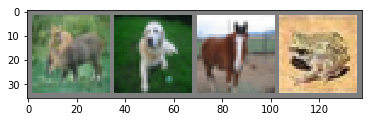

In [27]:
def imshow(img):
    img = img / 2 + 0.5 # Un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Creating the NN

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 12)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [34]:
net.parameters

<bound method Module.parameters of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=12, bias=True)
)>

## Define the Loss Function and Optimizer

In [30]:
import torch.optim as optim

In [35]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Define the training

In [41]:
for epoch in range(2):
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        
        inputs, labels = data
        
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print("Finished Training")

[1,  2000] loss: 1.464
[1,  4000] loss: 1.436
[1,  6000] loss: 1.396
[1,  8000] loss: 1.372
[1, 10000] loss: 1.359
[1, 12000] loss: 1.315
[2,  2000] loss: 1.248
[2,  4000] loss: 1.247
[2,  6000] loss: 1.252
[2,  8000] loss: 1.240
[2, 10000] loss: 1.226
[2, 12000] loss: 1.194
Finished Training


## Test the model on testing data

Sanity check

GroundTruth:    cat  ship  ship plane


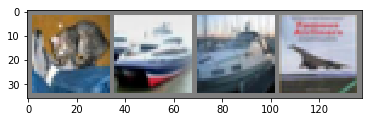

In [43]:
dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [44]:
outputs = net(images)

Network predictions on a snippet of the test set

In [67]:
# Need to include 1 to indicate that you want to max rank 1
# Max (outputs, 0) would result in the maximum value of each column
# Max (outputs, 1) resuls i the maximum value for each row
print(outputs.shape)
print(outputs)
_, predicted = torch.max(outputs, 1)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

torch.Size([4, 12])
tensor([[-1.4219e+00, -1.7584e+00,  1.6268e+00,  2.7262e+00,  1.8945e+00,
          2.6488e+00,  3.4705e+00,  9.9572e-01, -2.3676e+00, -6.5829e-01,
         -3.9044e+00, -4.2437e+00],
        [-1.0347e+00, -1.9823e+00,  4.0501e+00,  3.0008e+00,  1.4865e+00,
          4.9013e+00,  6.0322e-01,  3.6395e+00, -3.1652e+00, -1.7524e+00,
         -5.3904e+00, -5.8346e+00],
        [ 2.2857e+00,  1.6755e+00, -5.3777e-03,  8.1731e-01,  1.1954e+00,
          8.2435e-03, -6.1048e-01,  7.9349e-01, -7.3907e-01,  1.8096e+00,
         -3.8715e+00, -4.6055e+00],
        [-5.2793e-01, -4.7258e-01,  1.6167e+00,  3.8045e-01,  3.7017e+00,
          1.7996e+00,  3.2583e-01,  6.2070e+00, -2.4960e+00, -3.3247e-01,
         -5.2789e+00, -4.8269e+00]])
tensor([6, 5, 0, 7])
Predicted:   frog   dog plane horse


Overall score of the network

In [53]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        break
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
        

Accuracy of the network on the 10000 test images: 57 %
